In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!ls data/

heart_test.csv	heart_train.csv  household_power_consumption.csv


In [3]:
dataset = pd.read_csv('data/household_power_consumption.csv')

In [4]:
print(dataset.shape)
dataset.head()

(2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
dataset['Global_active_power'] = dataset['Global_active_power'].astype('str').replace({'?':None}).astype(float)
dataset['Global_reactive_power'] = dataset['Global_reactive_power'].astype('str').replace({'?':None}).astype(float)
dataset['Voltage'] = dataset['Voltage'].astype('str').replace({'?':None}).astype(float)
dataset['Global_intensity'] = dataset['Global_intensity'].astype('str').replace({'?':None}).astype(float)
dataset['Sub_metering_1'] = dataset['Sub_metering_1'].astype('str').replace({'?':None}).astype(float)
dataset['Sub_metering_2'] = dataset['Sub_metering_2'].astype('str').replace({'?':None}).astype(float)

In [6]:
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
dataset.interpolate(inplace=True)

# Values distribution

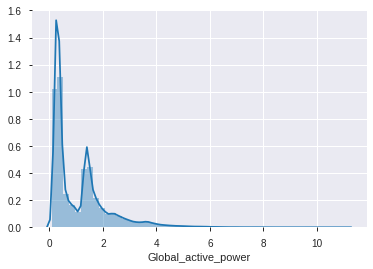

In [8]:
sns.distplot(dataset['Global_active_power'], kde=True)

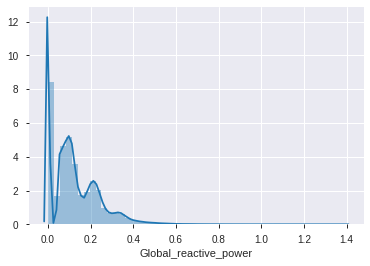

In [9]:
sns.distplot(dataset['Global_reactive_power'], kde=True)

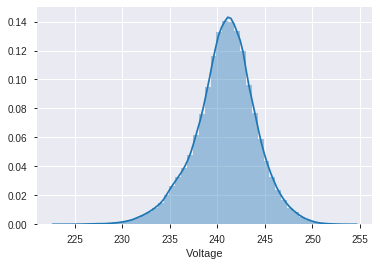

In [10]:
sns.distplot(dataset['Voltage'], kde=True)

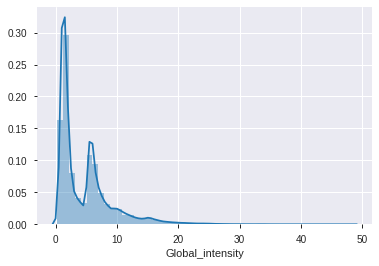

In [11]:
sns.distplot(dataset['Global_intensity'], kde=True)

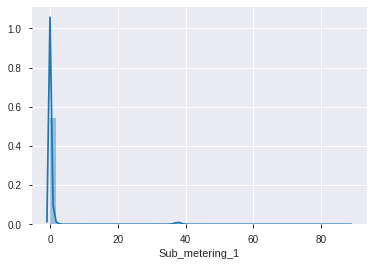

In [12]:
sns.distplot(dataset['Sub_metering_1'], kde=True)

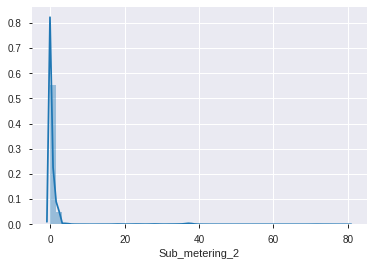

In [13]:
sns.distplot(dataset['Sub_metering_2'], kde=True)

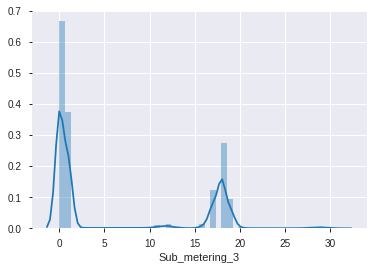

In [14]:
sns.distplot(dataset['Sub_metering_3'], kde=True)

# Global active power daily average

In [15]:
average = dataset.drop(columns=['Time']).groupby('Date', sort=False).aggregate(np.mean)
average.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
16/12/2006,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
17/12/2006,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
18/12/2006,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
19/12/2006,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
20/12/2006,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


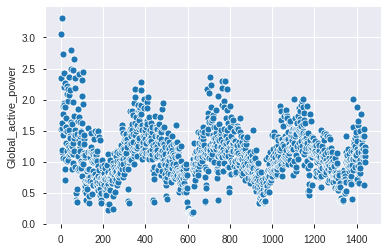

In [16]:
sns.scatterplot(x=np.arange(average['Global_active_power'].size), y='Global_active_power', data=average)

There is seasonal behavior, since global active power is constantly increasing and then decreasing.
It is also evident that with years of consumption decreases, but not much

# 01-02-2008-02-02-2008

In [17]:
time_interval = dataset[(dataset['Date'] == '1/2/2008') | (dataset['Date'] == '2/2/2008')]
time_interval.set_index(np.arange(time_interval['Time'].size), inplace=True)
time_interval.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/2/2008,00:00:00,2.268,0.184,239.79,9.4,0.0,0.0,18.0
1,1/2/2008,00:01:00,2.210,0.188,240.70,9.2,0.0,0.0,17.0
2,1/2/2008,00:02:00,2.270,0.184,239.96,9.4,0.0,0.0,18.0
3,1/2/2008,00:03:00,2.238,0.182,239.63,9.4,0.0,0.0,18.0
4,1/2/2008,00:04:00,2.204,0.184,240.11,9.2,0.0,0.0,17.0


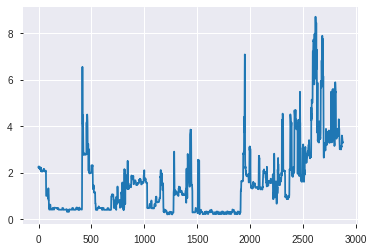

In [18]:
sns.lineplot(data=time_interval.loc[:, 'Global_active_power'])

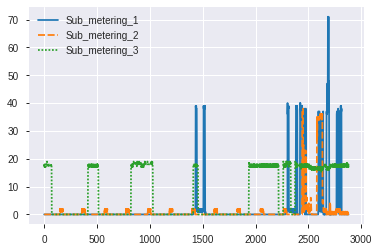

In [19]:
sns.lineplot(data=time_interval.loc[:, ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

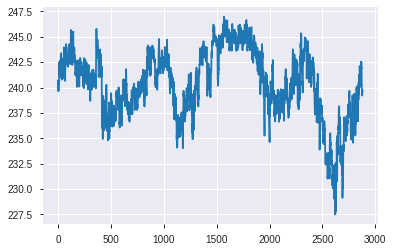

In [20]:
sns.lineplot(data=time_interval.loc[:, 'Voltage'])

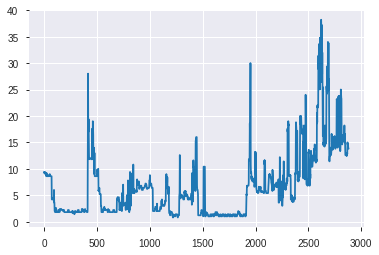

In [21]:
sns.lineplot(data=time_interval.loc[:, 'Global_intensity'])

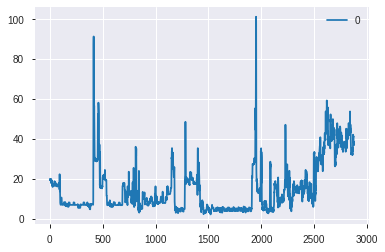

In [22]:
energy_consumed = pd.DataFrame(time_interval['Global_active_power'] * 1000 / 60 - time_interval['Sub_metering_1'] - time_interval['Sub_metering_2'] - time_interval['Sub_metering_3'], np.arange(time_interval.shape[0]))
sns.lineplot(data=energy_consumed.loc[:, :])

# Detecting outliers

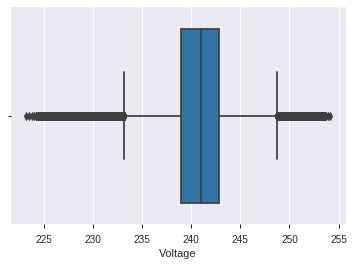

In [23]:
sns.boxplot(x=dataset['Voltage'])

In [24]:
Q1 = dataset['Voltage'].quantile(0.25)
Q3 = dataset['Voltage'].quantile(0.75)
IQR = Q3 - Q1
outliers = (dataset['Voltage'] < (Q1 - 1.5 * IQR)) | (dataset['Voltage'] > (Q3 + 1.5 * IQR))
outliers[outliers == True].size

52195

# Correlation between columns

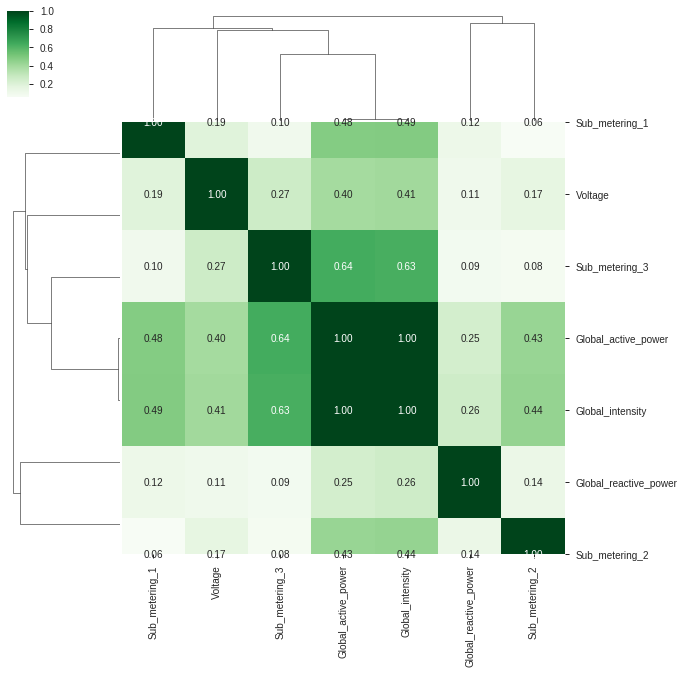

In [25]:
sns.clustermap(data=dataset.corr().abs(), annot=True, fmt='.2f', cmap='Greens')

# Preprocessing

In [26]:
# Delete ouliers from Voltage which where detected before
dataset = dataset.loc[outliers[outliers==False].index, :]
dataset.set_index(np.arange(dataset.shape[0]), inplace=True)

In [27]:
# Create date and time features 
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [28]:
date = pd.DataFrame(columns=['Year', 'Month', 'Day'])
time = pd.DataFrame(columns=['Hour', 'Minute'])
date['Year'] = dataset['Date'].dt.year
date['Month'] = dataset['Date'].dt.month
date['Day'] = dataset['Date'].dt.day
time['Hour'] = dataset['Time'].dt.hour
time['Minute'] = dataset['Time'].dt.minute

In [29]:
shifted = pd.DataFrame(columns=['GAP_p1', 'GAP_p2', 'GAP_p3'])
shifted['GAP_p1'] = dataset['Global_active_power'].shift(periods=1)
shifted['GAP_p2'] = dataset['Global_active_power'].shift(periods=2)
shifted['GAP_p3'] = dataset['Global_active_power'].shift(periods=3)

In [30]:
dataset = pd.concat([dataset.drop(columns=['Date', 'Time']), date, time, shifted], axis=1)
dataset.dropna(inplace=True)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,GAP_p1,GAP_p2,GAP_p3
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,5.374,5.360,4.216
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,5.388,5.374,5.360
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006,12,16,17,29,3.666,5.388,5.374
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16,17,30,3.520,3.666,5.388
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006,12,16,17,31,3.702,3.520,3.666


In [31]:
# Feature Scaling
import sklearn.preprocessing
sc = sklearn.preprocessing.StandardScaler()
dataset.iloc[:, 2:] = sklearn.preprocessing.StandardScaler().fit_transform(dataset.iloc[:, 2:])
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,GAP_p1,GAP_p2,GAP_p3
3,5.388,0.502,-2.465782,4.328088,-0.174359,-0.038809,1.262448,-2.176139,1.60053,0.028342,0.796368,-0.144705,4.224599,4.210837,3.087908
4,3.666,0.528,-1.801634,2.640735,-0.174359,-0.038809,1.262448,-2.176139,1.60053,0.028342,0.796368,-0.086959,4.238341,4.224579,4.210825
5,3.520,0.522,-2.027581,2.453251,-0.174359,0.143122,1.262448,-2.176139,1.60053,0.028342,0.796368,-0.029214,2.548065,4.238321,4.224567
6,3.702,0.520,-2.003617,2.640735,-0.174359,-0.038809,1.262448,-2.176139,1.60053,0.028342,0.796368,0.028532,2.404755,2.548052,4.238309
7,3.700,0.520,-1.959112,2.640735,-0.174359,-0.038809,1.262448,-2.176139,1.60053,0.028342,0.796368,0.086278,2.583402,2.404742,2.548044


In [32]:
# Generate X and y for model training
X = dataset.drop('Global_active_power', axis=1).to_numpy()
y = dataset.loc[:, 'Global_active_power'].to_numpy()

# Automatic report for the dataset via pandas_profiling library

In [37]:
pp.ProfileReport(dataset)

# Conclusion

I would use all the columns except Global_intensity as it is highly correlated with Global_active_power. There are dependency between these columns, so we need to drop one of them. All other columns are suitable for further use.